# Sampling Comparison

In [1]:
from __future__ import annotations

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [2]:
def drag(
    t: list | npt.NDArray,
    T: float,
    dt: float,
    sigma: float,
    beta: float,
) -> npt.NDArray[np.complex128]:
    mu = T / 2
    real = np.exp(-((t - mu) ** 2) / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)
    real -= np.exp(-((mu / sigma) ** 2) / 2) / (np.sqrt(2 * np.pi) * sigma)
    imag = beta * (mu - t) / sigma**2 * real
    return real + 1j * imag


def plot(
    iq_ideal: npt.NDArray[np.complex128],
    iq_sample: npt.NDArray[np.complex128],
    t_sample: npt.NDArray[float],
    t_pwc: npt.NDArray[float],
):
    i_ideal = np.real(iq_ideal)
    q_ideal = np.imag(iq_ideal)

    i_sample = np.real(iq_sample)
    q_sample = np.imag(iq_sample)

    plt.plot(t_ideal, i_ideal, alpha=1, linestyle="-", color="C0", label="I")
    plt.plot(t_ideal, q_ideal, alpha=1, linestyle="-", color="C1", label="Q")
    plt.plot(t_sample, i_sample, alpha=0.5, marker="o", linestyle="--", color="C0")
    plt.plot(t_sample, q_sample, alpha=0.5, marker="o", linestyle="--", color="C1")
    plt.fill_between(t_pwc, i_sample, step="mid", alpha=0.4, color="C0")
    plt.fill_between(t_pwc, q_sample, step="mid", alpha=0.4, color="C1")
    plt.grid(color="gray", linestyle="--", alpha=0.2)
    plt.xticks(np.arange(0, T, dt))
    plt.xlim(0, T)
    plt.legend()
    plt.show()

## Parameters

In [3]:
T = 5
dt = 1
N = int(T / dt)
sigma = T / 6
alpha = -0.3 * (2 * np.pi)
beta = -1 / alpha

## Linspace

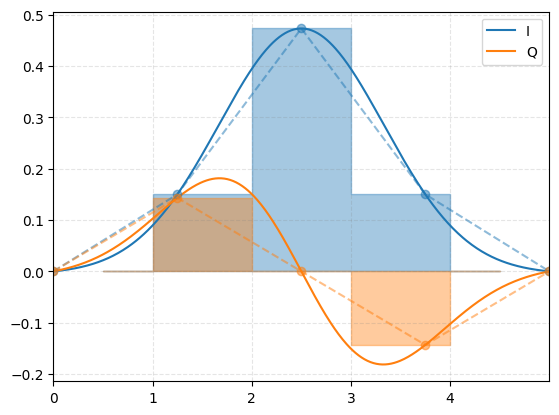

sum_ideal = 0.9707
sum_pwc = 0.7736
sum_trapz = 0.9670
diff_pwc = -20.304%
diff_trapz = -0.380%


In [4]:
t_ideal = np.linspace(0, T, N * 100)
iq_ideal = drag(
    t=t_ideal,
    T=T,
    dt=dt,
    sigma=sigma,
    beta=beta,
)

t_sample = np.linspace(0, T, N)
iq_sample = drag(
    t=t_sample,
    T=T,
    dt=dt,
    sigma=sigma,
    beta=beta,
)

t_pwc = np.linspace(dt / 2, T - dt / 2, N)

plot(
    iq_ideal=iq_ideal,
    iq_sample=iq_sample,
    t_sample=t_sample,
    t_pwc=t_pwc,
)

sum_ideal = sum(iq_ideal.real) * (t_ideal[1] - t_ideal[0])
sum_pwc = sum(iq_sample.real) * (t_pwc[1] - t_pwc[0])
sum_trapz = np.trapz(iq_sample.real, t_sample)

print(f"sum_ideal = {sum_ideal:.4f}")
print(f"sum_pwc = {sum_pwc:.4f}")
print(f"sum_trapz = {sum_trapz:.4f}")
print(f"diff_pwc = {(sum_pwc - sum_ideal) / sum_ideal:.3%}")
print(f"diff_trapz = {(sum_trapz - sum_ideal) / sum_ideal:.3%}")

## Midpoint

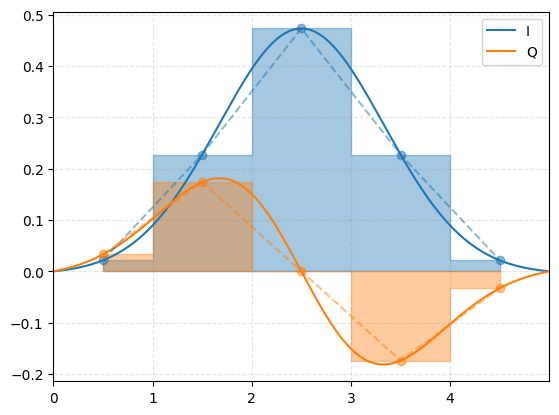

sum_ideal = 0.9707
sum_pwc = 0.9719
sum_trapz = 0.9612
diff_pwc = 0.126%
diff_trapz = -0.984%


In [5]:
sigma = T / 6
alpha = -0.3 * (2 * np.pi)
beta = -1 / alpha

t_ideal = np.linspace(0, T, N * 100)
iq_ideal = drag(
    t=t_ideal,
    T=T,
    dt=dt,
    sigma=sigma,
    beta=beta,
)

t_sample = np.linspace(dt / 2, T - dt / 2, N)
iq_sample = drag(
    t=t_sample,
    T=T,
    dt=dt,
    sigma=sigma,
    beta=beta,
)

plot(
    iq_ideal=iq_ideal,
    iq_sample=iq_sample,
    t_sample=t_sample,
    t_pwc=t_sample,
)

sum_ideal = sum(iq_ideal.real) * (t_ideal[1] - t_ideal[0])
sum_pwc = sum(iq_sample.real) * (t_sample[1] - t_sample[0])

t_trapz = np.append(0, t_sample)
t_trapz = np.append(t_trapz, T)
i_trapz = np.append(0, iq_sample.real)
i_trapz = np.append(i_trapz, 0)
sum_trapz = np.trapz(i_trapz, t_trapz)

print(f"sum_ideal = {sum_ideal:.4f}")
print(f"sum_pwc = {sum_pwc:.4f}")
print(f"sum_trapz = {sum_trapz:.4f}")
print(f"diff_pwc = {(sum_pwc - sum_ideal) / sum_ideal:.3%}")
print(f"diff_trapz = {(sum_trapz - sum_ideal) / sum_ideal:.3%}")